In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving digit-recognizer.zip to digit-recognizer.zip


In [24]:
import pandas as pd

In [25]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
train=pd.read_csv("/content/train.csv")
train.shape

(42000, 785)

In [28]:
test=pd.read_csv("/content/test.csv")
test.shape

(28000, 784)

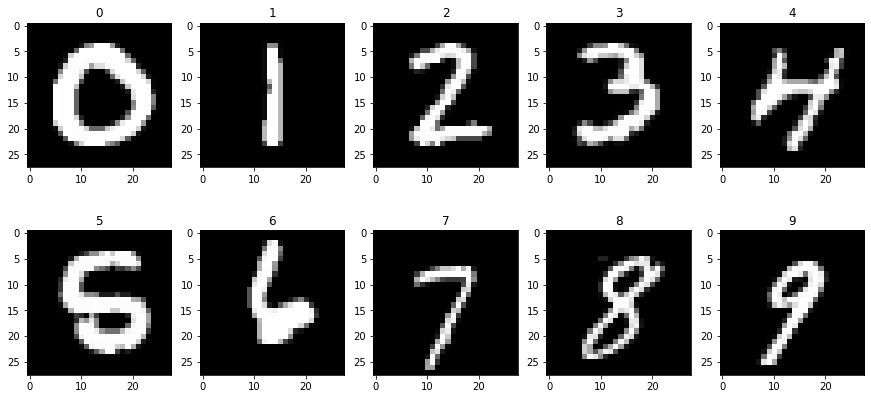

In [29]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.arange(0,10), start=1):
    t = train[train['label']==c].values[1]
    t = t[1:]
    plt.subplot(2,5,i)
    plt.title(c)
    plt.imshow(t.reshape(28,28), cmap='gray')

In [30]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_test = test.values
X_test.shape

(28000, 784)

In [33]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X = X.reshape((42000, 28, 28, 1))

In [35]:
datagen = ImageDataGenerator(rotation_range=10,  zoom_range = 0.1,  width_shift_range=0.1,  height_shift_range=0.1)

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D())
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.08)
model.summary()
history= model.fit_generator(datagen.flow(X, y, batch_size = 64), 
                                             epochs =10 , validation_data = (X_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


657/657 [==============================] - 29s 43ms/step - loss: 0.0799 - accuracy: 0.9765 - val_loss: 0.0495 - val_accuracy: 0.9887
Epoch 2/10
657/657 [==============================] - 15s 23ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0388 - val_accuracy: 0.9923
Epoch 3/10
657/657 [==============================] - 15s 23ms/step - loss: 0.0643 - accuracy: 0.9818 - val_loss: 0.0371 - val_accuracy: 0.9905
Epoch 4/10
657/657 [==============================] - 15s 23ms/step - loss: 0.0606 - accuracy: 0.9827 - val_loss: 0.0330 - val_accuracy: 0.9929
Epoch 5/10
657/657 [==============================] - 15s 23ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.0290 - val_accuracy: 0.9914
Epoch 6/10
657/657 [==============================] - 15s 23ms/step - loss: 0.0589 - accuracy: 0.9834 - val_loss: 0.0280 - val_accuracy: 0.9923
Epoch 7/10
657/657 [==============================] - 16s 25ms/step - loss: 0.0531 - accuracy: 0.9845 - val_loss: 0.0196 - val_accuracy: 0.9952
Epo

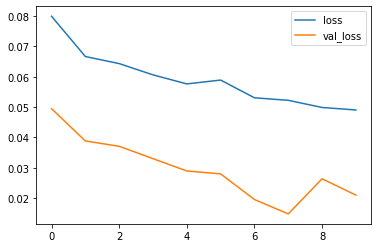

In [47]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

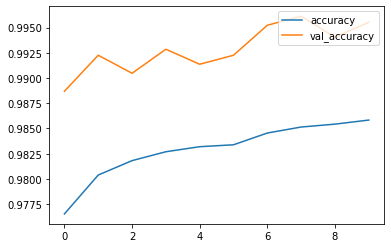

In [48]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

In [49]:
ensemble_cnn_pred = np.zeros((X_test.shape[0], 10))
ensemble_cnn_pred.shape

(28000, 10)

In [50]:
X_test_scaled = X_test_scaled.reshape((28000, 28, 28, 1))
X_test_scaled.shape

(28000, 28, 28, 1)

In [51]:
ensemble_cnn_pred = ensemble_cnn_pred + model.predict(X_test_scaled)
    
np.sum(ensemble_cnn_pred[0])

875/875 [==============================] - 2s 2ms/step


1.0000000000208702

In [52]:
ensemble_cnn_pred = np.argmax(ensemble_cnn_pred, axis = 1)
ensemble_cnn_pred[0]

2

In [53]:
ensemble_cnn_pred.shape

(28000,)

In [54]:
pred_df_ensemble_cnn = pd.DataFrame(columns = ['ImageId', 'Label'])
pred_df_ensemble_cnn['ImageId'] = np.arange(1, 28001)
pred_df_ensemble_cnn['Label'] = ensemble_cnn_pred
pred_df_ensemble_cnn

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
